In [54]:
import tensorflow as tf
print(tf.__version__)
import random
seed = 7
np.random.seed(seed)


2.16.1


In [29]:
import numpy as np
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
signals_df = pd.read_csv('Signals.csv')


In [31]:
missing_percentage = (signals_df.isnull().sum() / len(signals_df)) * 100
print("Missing Values Percentage:")
print(missing_percentage)

Missing Values Percentage:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [32]:
duplicate_mask = signals_df.duplicated()

if duplicate_mask.any():
    signals_df[duplicate_mask] = signals_df[duplicate_mask].fillna(method='ffill')
    print("Missing values imputed for duplicate records.")
else:
    print("No duplicate records found.")


Missing values imputed for duplicate records.


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_18572\2461123956.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  signals_df[duplicate_mask] = signals_df[duplicate_mask].fillna(method='ffill')


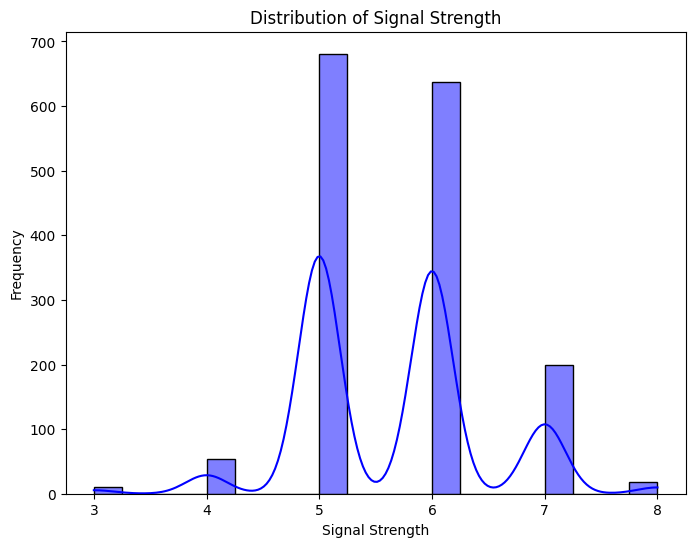

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(signals_df['Signal_Strength'], bins=20, kde=True, color='blue')
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.show()

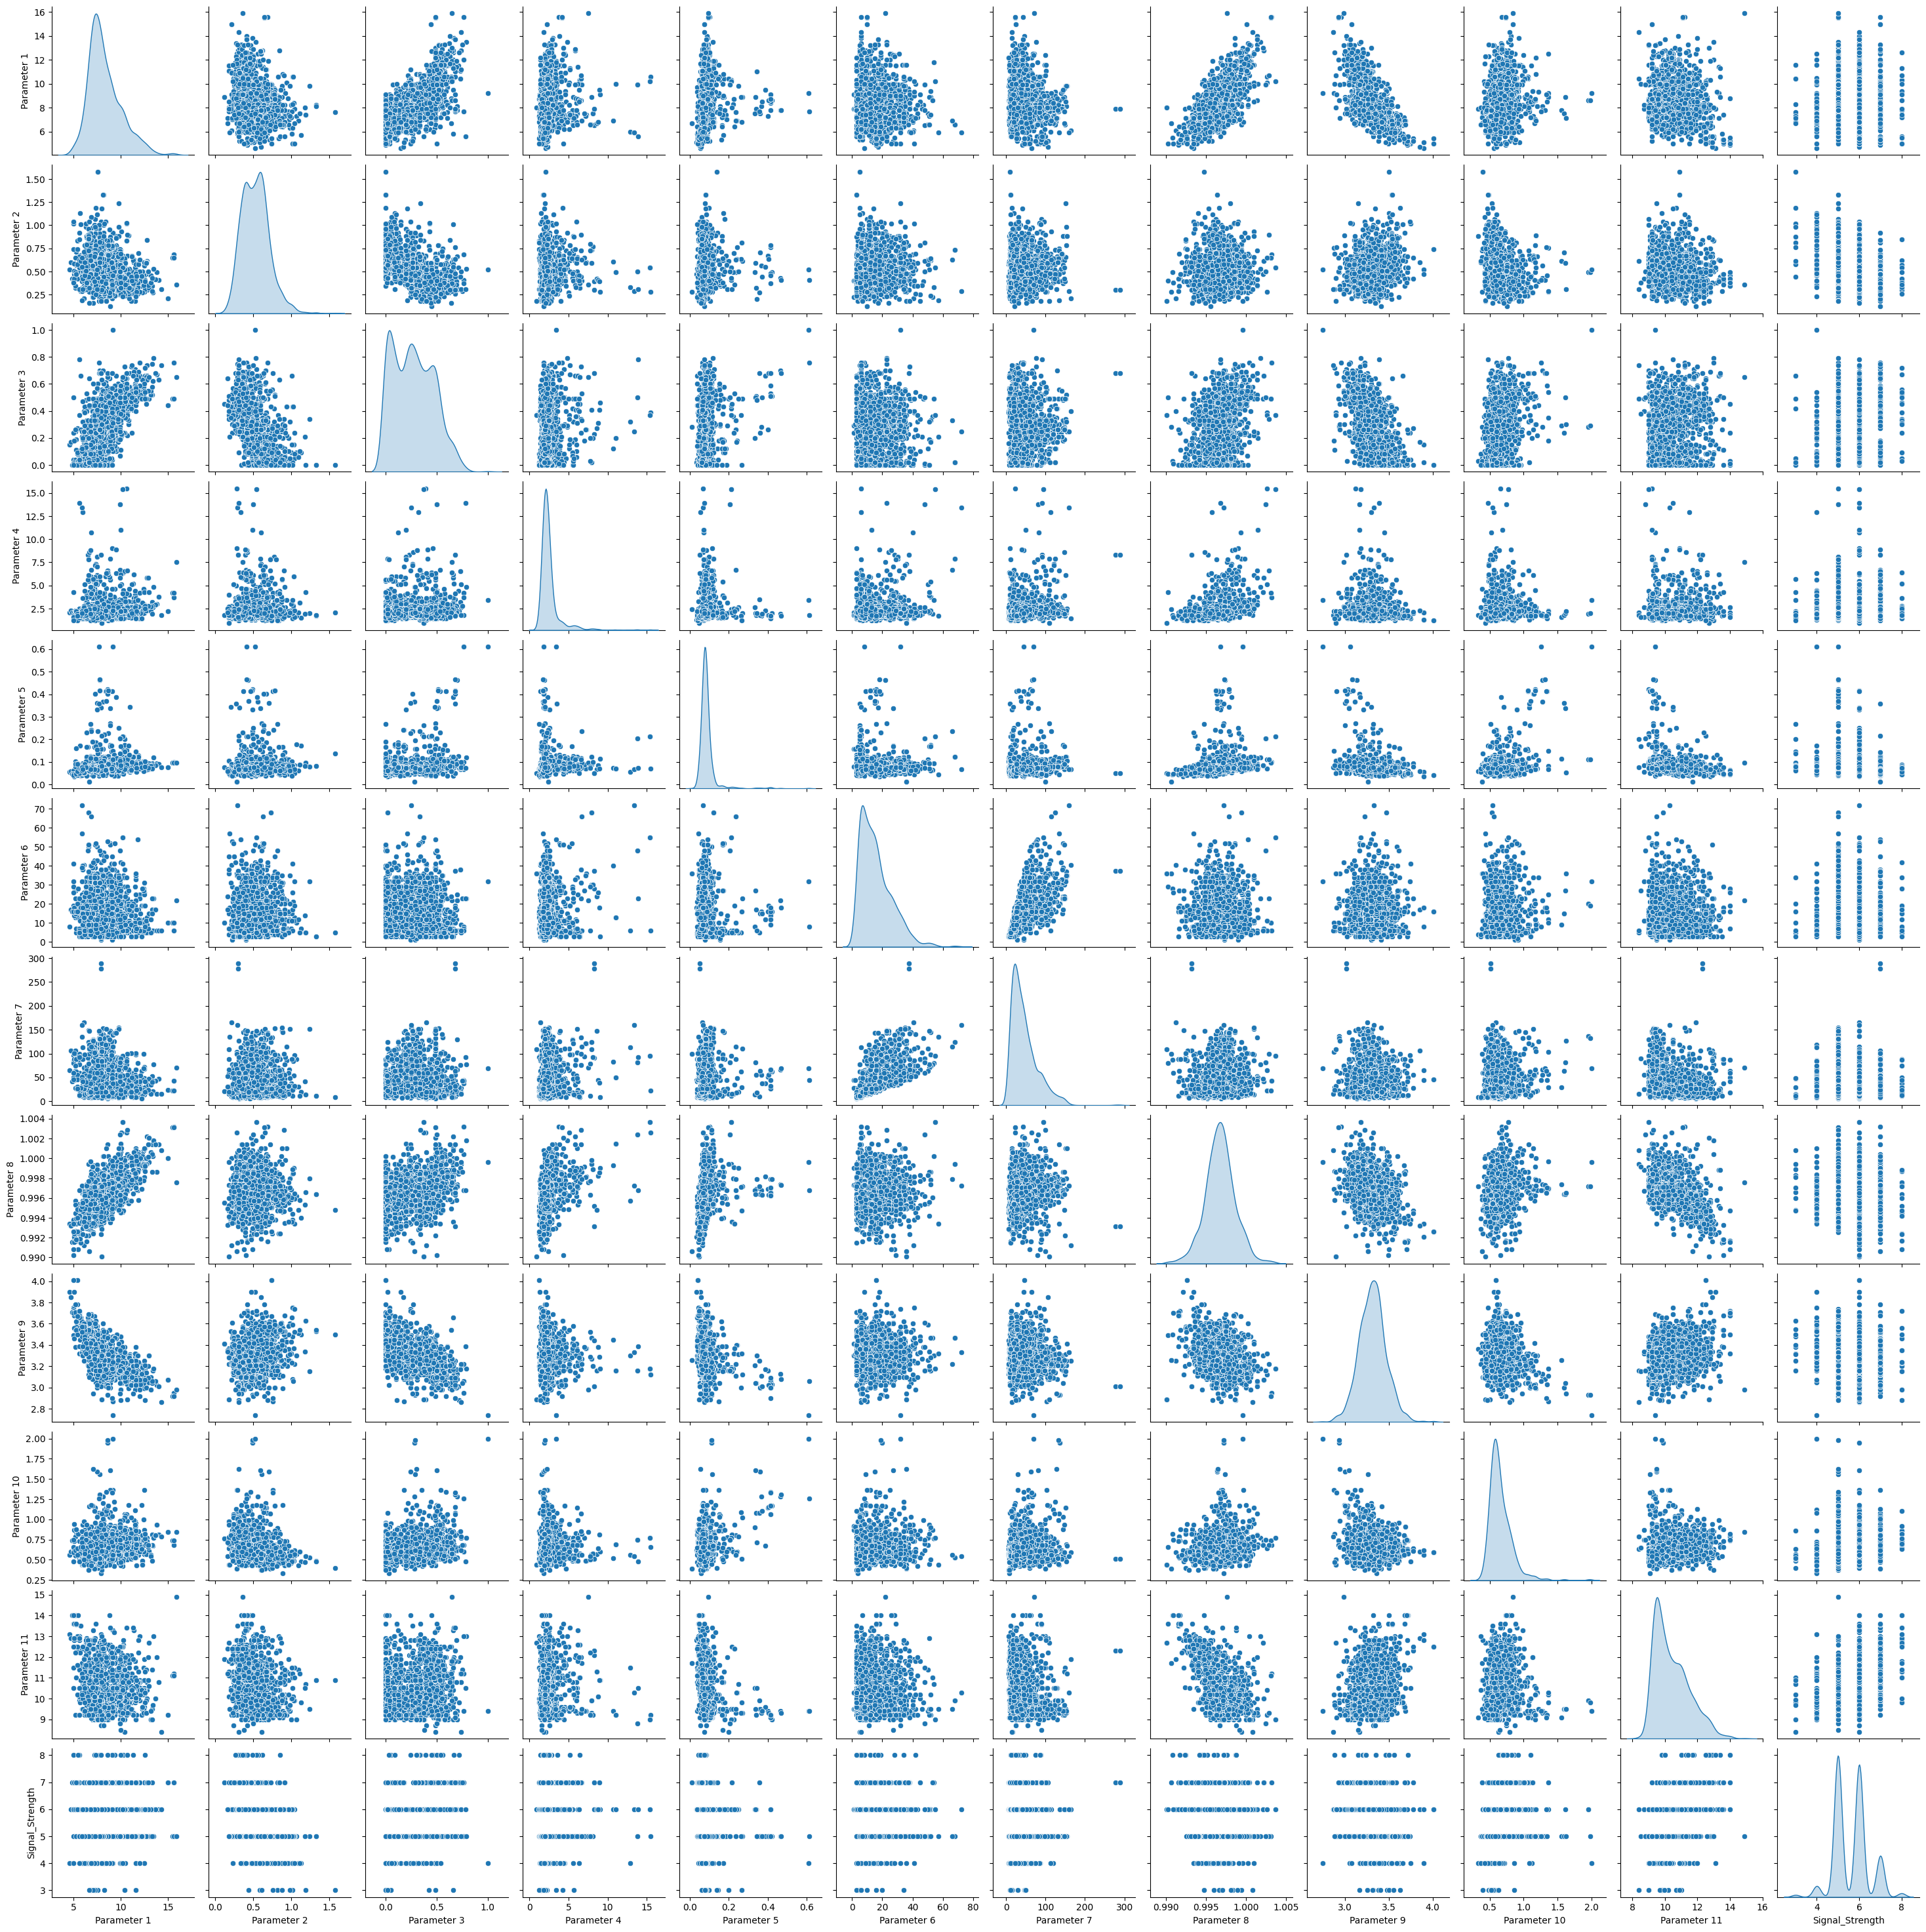

In [47]:
sns.pairplot(signals_df,diag_kind='kde')
plt.show()

In [34]:
#the visualization of signal strength yields a bi-modal graph
#ditribution is mainly populated around the signal strength of 5-6 and with a frequency of600-700

In [49]:
X = signals_df.drop("Signal_Strength", axis=1)
y = signals_df['Signal_Strength']

In [55]:
from sklearn.model_selection import train_test_split

# splitting to create test data
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30, random_state=seed)

In [56]:
X_vtrain.shape


(1119, 11)

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=.20, random_state=seed)

In [58]:
X_train.shape


(895, 11)

In [59]:
print("Shapes of variables:")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

train_test_sync = (len(X_train) == len(Y_train)) and (len(X_test) == len(Y_test))
print("Train and test data in sync:", train_test_sync)


Shapes of variables:
X_train shape: (895, 11)
Y_train shape: (1119,)
X_test shape: (480, 11)
Y_test shape: (480,)
Train and test data in sync: False


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(BatchNormalization(input_shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='binary_crossentropy')
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=20, batch_size=10)



Epoch 1/20


C:\Users\Sandeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6668 - val_loss: -47.9596
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -53.3879 - val_loss: -47.2117
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -65.2560 - val_loss: -59.6304
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -70.1837 - val_loss: -68.8285
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -73.1604 - val_loss: -71.1673
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -73.5651 - val_loss: -72.5059
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -73.9188 - val_loss: -72.5119
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -73.9655 - val_loss: -72.5157
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -73.9661 - val_loss: -72.5185
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -73.9676 - val_loss: -72.5221
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -73.9757 - val_loss: -72.5314
Epoch 12/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(BatchNormalization(input_shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=20, batch_size=10)


Epoch 1/20


C:\Users\Sandeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.8892 - val_loss: 9.2151
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8673 - val_loss: 1.1506
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6640 - val_loss: 0.7257
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5781 - val_loss: 0.6448
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5289 - val_loss: 0.6457
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5030 - val_loss: 0.6544
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4869 - val_loss: 0.6519
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4743 - val_loss: 0.6423
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4650 - val_loss: 0.6313
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4574 - val_loss: 0.6214
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4507 - val_loss: 0.6120
Epoch 12/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4451 - val_loss: 0.6053


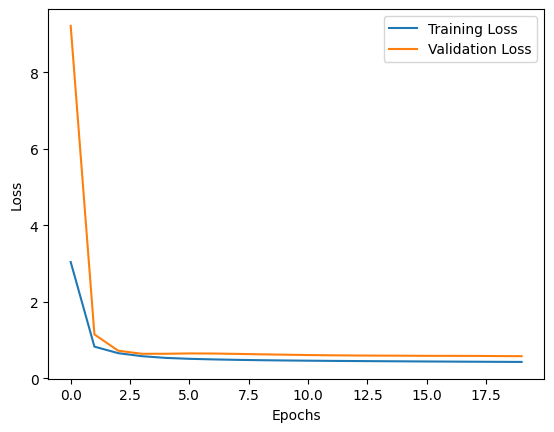

In [74]:
import matplotlib.pyplot as plt

# Visualizing training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [76]:
import tensorflow
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
import math

In [78]:
h5f = h5py.File('Signals.h5','r')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [79]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [80]:
print(f'Size of X_train is {X_train.shape}')
print(f'Size of y_train is {y_train.shape}\n')

print(f'Size of X_val is {X_val.shape}')
print(f'Size of y_val is {y_val.shape}\n')

print(f'Size of X_test is {X_test.shape}')
print(f'Size of y_test is {y_test.shape}')

Size of X_train is (42000, 32, 32)
Size of y_train is (42000,)

Size of X_val is (60000, 32, 32)
Size of y_val is (60000,)

Size of X_test is (18000, 32, 32)
Size of y_test is (18000,)


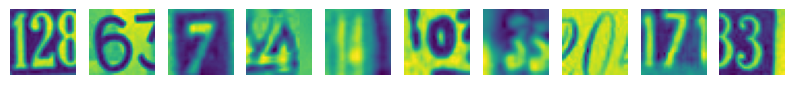

Corresponding labels: 925     7
363     5
906     5
426     6
1251    5
1274    6
346     7
1105    5
1564    5
643     5
Name: Signal_Strength, dtype: int64


In [83]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()
print("Corresponding labels:", Y_train[:10])

In [84]:
X_train = X_train.reshape(42000, 32*32)
X_val= X_val.reshape(X_val.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0],32*32)

print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of X_val is {X_val.shape}')
print(f'Shape of X_test is {X_test.shape}')

Shape of X_train is (42000, 1024)
Shape of X_val is (60000, 1024)
Shape of X_test is (18000, 1024)


In [85]:
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

Min value is 0.0
Max value is 254.97450256347656


In [86]:
X_train = X_train/255.0
X_val= X_val/255.0
X_test = X_test/255.0

In [87]:
print('After Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

After Normalization
Min value is 0.0
Max value is 0.9998999834060669


In [88]:
print(f'Sample value before one hot encode {y_train[0]}\n')
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_val= tensorflow.keras.utils.to_categorical(y_val,num_classes=10)
y_test= tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(f'Sample value after one hot encode {y_train[0]}')

Sample value before one hot encode 2

Sample value after one hot encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Label for image at index 1 is 2
Label for image at index 2 is 6
Label for image at index 3 is 7
Label for image at index 4 is 4
Label for image at index 5 is 4
Label for image at index 6 is 0
Label for image at index 7 is 3
Label for image at index 8 is 0
Label for image at index 9 is 7
Label for image at index 10 is 3


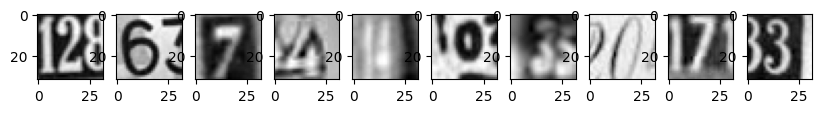

In [89]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'Label for image at index {i+1} is {np.argmax(y_train[0:10][i])}')

In [94]:
num_classes = len(np.unique(Y_train))
print("Total number of classes:", num_classes)

Total number of classes: 6
